# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [ ]:
# The new version of dataset is only available in the tfds-nightly package.
%pip --no-cache-dir install tfds-nightly --user
# DON'T MISS TO RESTART THE KERNEL

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# TODO: Make all necessary imports.
import numpy as np
import pandas as pd
import requests
import json
from datetime import datetime
import tensorflow_hub as hub

from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [6]:
print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 tf.keras version:', tf.keras.__version__)
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')

Using:
	• TensorFlow version: 2.0.0
	• tf.keras version: 2.2.4-tf
	• GPU device not found. Running on CPU


## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [8]:
# Download data to default local directory "~/tensorflow_datasets"
!python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums=True --datasets=oxford_flowers102

# TODO: Load the dataset with TensorFlow Datasets.
dataset, dataset_info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# TODO: Create a training set, a validation set and a test set.
training_set, validation_set, test_set = dataset['train'], dataset['validation'], dataset['test']



I0604 17:48:08.067573 4621145536 download_and_prepare.py:171] Running download_and_prepare for datasets:
oxford_flowers102
I0604 17:48:08.068196 4621145536 download_and_prepare.py:172] Version: "None"
W0604 17:48:08.068834 4621145536 dataset_builder.py:575] Found a different version 2.1.1 of dataset oxford_flowers102 in data_dir /Users/abdullahmohammed/tensorflow_datasets. Using currently defined version 0.0.1.
I0604 17:48:08.068923 4621145536 dataset_builder.py:187] Load pre-computed datasetinfo (eg: splits) from bucket.
I0604 17:48:08.912966 4621145536 dataset_info.py:410] Loading info from GCS for oxford_flowers102/0.0.1
I0604 17:48:11.039200 4621145536 download_and_prepare.py:122] download_and_prepare for dataset oxford_flowers102/0.0.1...
I0604 17:48:11.718163 4621145536 dataset_builder.py:273] Generating dataset oxford_flowers102 (/Users/abdullahmohammed/tensorflow_datasets/oxford_flowers102/0.0.1)
Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Extrac

Extraction completed...: 0 file [00:16, ? file/s]
Dl Size...:   7%|#9                          | 23/328 [00:16<02:34,  1.97 MiB/s]

Extraction completed...: 0 file [00:16, ? file/s]
Dl Size...:   7%|##                          | 24/328 [00:17<02:19,  2.17 MiB/s]

Extraction completed...: 0 file [00:17, ? file/s]
Dl Size...:   8%|##1                         | 25/328 [00:17<02:10,  2.33 MiB/s]

Extraction completed...: 0 file [00:17, ? file/s]
Dl Size...:   8%|##2                         | 26/328 [00:17<02:08,  2.36 MiB/s]

Extraction completed...: 0 file [00:17, ? file/s]
Dl Size...:   8%|##3                         | 27/328 [00:18<01:57,  2.57 MiB/s]

Extraction completed...: 0 file [00:18, ? file/s]
Dl Size...:   9%|##3                         | 28/328 [00:18<02:02,  2.45 MiB/s]

Extraction completed...: 0 file [00:18, ? file/s]
Dl Size...:   9%|##4                         | 29/328 [00:19<02:06,  2.37 MiB/s]

Extraction completed...: 0 file [00:19, ? file/s]
Dl Size...:   9%|##5      

Extraction completed...: 0 file [00:28, ? file/s]
Dl Size...:  18%|#####1                      | 60/328 [00:28<01:20,  3.32 MiB/s]

Extraction completed...: 0 file [00:28, ? file/s]
Dl Size...:  19%|#####2                      | 61/328 [00:28<01:19,  3.38 MiB/s]

Extraction completed...: 0 file [00:28, ? file/s]
Dl Size...:  19%|#####2                      | 62/328 [00:29<01:18,  3.37 MiB/s]

Extraction completed...: 0 file [00:29, ? file/s]
Dl Size...:  19%|#####3                      | 63/328 [00:29<01:18,  3.38 MiB/s]

Extraction completed...: 0 file [00:29, ? file/s]
Dl Size...:  20%|#####4                      | 64/328 [00:29<01:13,  3.61 MiB/s]

Extraction completed...: 0 file [00:29, ? file/s]
Dl Size...:  20%|#####5                      | 65/328 [00:29<01:16,  3.45 MiB/s]

Extraction completed...: 0 file [00:29, ? file/s]
Dl Size...:  20%|#####6                      | 66/328 [00:30<01:13,  3.56 MiB/s]

Extraction completed...: 0 file [00:30, ? file/s]
Dl Size...:  20%|#####7   

Extraction completed...: 0 file [00:36, ? file/s]
Dl Size...:  30%|########2                   | 97/328 [00:36<00:39,  5.81 MiB/s]

Extraction completed...: 0 file [00:36, ? file/s]
Dl Size...:  30%|########3                   | 98/328 [00:36<00:40,  5.62 MiB/s]

Extraction completed...: 0 file [00:36, ? file/s]
Dl Size...:  30%|########4                   | 99/328 [00:37<00:38,  5.97 MiB/s]

Extraction completed...: 0 file [00:37, ? file/s]
Dl Size...:  30%|########2                  | 100/328 [00:37<00:37,  6.06 MiB/s]

Extraction completed...: 0 file [00:37, ? file/s]
Dl Size...:  31%|########3                  | 101/328 [00:37<00:34,  6.54 MiB/s]

Extraction completed...: 0 file [00:37, ? file/s]
Dl Size...:  31%|########3                  | 102/328 [00:37<00:34,  6.47 MiB/s]

Extraction completed...: 0 file [00:37, ? file/s]
Dl Size...:  31%|########4                  | 103/328 [00:37<00:33,  6.74 MiB/s]

Extraction completed...: 0 file [00:37, ? file/s]
Dl Size...:  32%|########5

Extraction completed...: 0 file [00:43, ? file/s]
Dl Size...:  41%|###########1               | 135/328 [00:43<00:34,  5.59 MiB/s]

Extraction completed...: 0 file [00:43, ? file/s]
Dl Size...:  41%|###########1               | 136/328 [00:44<00:37,  5.14 MiB/s]

Dl Size...:  42%|###########2               | 137/328 [00:44<00:37,  5.14 MiB/s]

Extraction completed...: 0 file [00:44, ? file/s]
Dl Size...:  42%|###########3               | 138/328 [00:44<00:37,  5.11 MiB/s]

Extraction completed...: 0 file [00:44, ? file/s]
Dl Size...:  42%|###########4               | 139/328 [00:44<00:33,  5.58 MiB/s]

Extraction completed...: 0 file [00:44, ? file/s]
Dl Size...:  43%|###########5               | 140/328 [00:44<00:34,  5.37 MiB/s]

Extraction completed...: 0 file [00:44, ? file/s]
Dl Size...:  43%|###########6               | 141/328 [00:44<00:31,  5.87 MiB/s]

Extraction completed...: 0 file [00:44, ? file/s]
Dl Size...:  43%|###########6               | 142/328 [00:45<00:32,  5.70 Mi

Extraction completed...: 0 file [00:50, ? file/s]
Dl Size...:  52%|##############1            | 172/328 [00:50<00:32,  4.85 MiB/s]

Extraction completed...: 0 file [00:50, ? file/s]
Dl Size...:  53%|##############2            | 173/328 [00:51<00:30,  5.13 MiB/s]

Extraction completed...: 0 file [00:51, ? file/s]
Dl Size...:  53%|##############3            | 174/328 [00:51<00:28,  5.42 MiB/s]

Extraction completed...: 0 file [00:51, ? file/s]
Dl Size...:  53%|##############4            | 175/328 [00:51<00:28,  5.36 MiB/s]

Extraction completed...: 0 file [00:51, ? file/s]
Dl Size...:  54%|##############4            | 176/328 [00:51<00:29,  5.22 MiB/s]

Extraction completed...: 0 file [00:51, ? file/s]
Dl Size...:  54%|##############5            | 177/328 [00:51<00:26,  5.70 MiB/s]

Extraction completed...: 0 file [00:51, ? file/s]
Dl Size...:  54%|##############6            | 178/328 [00:52<00:25,  5.80 MiB/s]

Extraction completed...: 0 file [00:52, ? file/s]
Dl Size...:  55%|#########

Extraction completed...: 0 file [00:58, ? file/s]
Dl Size...:  64%|#################2         | 209/328 [00:58<00:28,  4.18 MiB/s]

Extraction completed...: 0 file [00:58, ? file/s]
Dl Size...:  64%|#################2         | 210/328 [00:58<00:30,  3.90 MiB/s]

Extraction completed...: 0 file [00:58, ? file/s]
Dl Size...:  64%|#################3         | 211/328 [00:59<00:29,  4.01 MiB/s]

Extraction completed...: 0 file [00:59, ? file/s]
Dl Size...:  65%|#################4         | 212/328 [00:59<00:25,  4.50 MiB/s]

Extraction completed...: 0 file [00:59, ? file/s]
Dl Size...:  65%|#################5         | 213/328 [00:59<00:28,  4.05 MiB/s]

Extraction completed...: 0 file [00:59, ? file/s]
Dl Size...:  65%|#################6         | 214/328 [00:59<00:25,  4.55 MiB/s]

Extraction completed...: 0 file [00:59, ? file/s]
Dl Size...:  66%|#################6         | 215/328 [00:59<00:23,  4.82 MiB/s]

Extraction completed...: 0 file [00:59, ? file/s]
Dl Size...:  66%|#########

Dl Size...:  75%|####################2      | 246/328 [01:06<00:21,  3.75 MiB/s]

Extraction completed...: 0 file [01:06, ? file/s]
Dl Size...:  75%|####################3      | 247/328 [01:06<00:21,  3.76 MiB/s]

Extraction completed...: 0 file [01:06, ? file/s]
Dl Size...:  76%|####################4      | 248/328 [01:06<00:21,  3.79 MiB/s]

Extraction completed...: 0 file [01:06, ? file/s]
Dl Size...:  76%|####################4      | 249/328 [01:06<00:20,  3.77 MiB/s]

Extraction completed...: 0 file [01:06, ? file/s]
Dl Size...:  76%|####################5      | 250/328 [01:07<00:29,  2.62 MiB/s]

Extraction completed...: 0 file [01:07, ? file/s]
Dl Size...:  77%|####################6      | 251/328 [01:08<00:29,  2.64 MiB/s]

Extraction completed...: 0 file [01:08, ? file/s]
Dl Size...:  77%|####################7      | 252/328 [01:08<00:31,  2.38 MiB/s]

Extraction completed...: 0 file [01:08, ? file/s]
Dl Size...:  77%|####################8      | 253/328 [01:08<00:31,  2.34 Mi

Extraction completed...: 0 file [01:26, ? file/s]
Dl Size...:  86%|#######################2   | 283/328 [01:27<00:20,  2.21 MiB/s]

Extraction completed...: 0 file [01:27, ? file/s]
Dl Size...:  87%|#######################3   | 284/328 [01:27<00:20,  2.14 MiB/s]

Extraction completed...: 0 file [01:27, ? file/s]
Dl Size...:  87%|#######################4   | 285/328 [01:28<00:20,  2.12 MiB/s]

Extraction completed...: 0 file [01:28, ? file/s]
Dl Size...:  87%|#######################5   | 286/328 [01:28<00:19,  2.21 MiB/s]

Extraction completed...: 0 file [01:28, ? file/s]
Dl Size...:  88%|#######################6   | 287/328 [01:29<00:18,  2.23 MiB/s]

Extraction completed...: 0 file [01:29, ? file/s]
Dl Size...:  88%|#######################7   | 288/328 [01:29<00:19,  2.05 MiB/s]

Extraction completed...: 0 file [01:29, ? file/s]
Dl Size...:  88%|#######################7   | 289/328 [01:30<00:18,  2.11 MiB/s]

Extraction completed...: 0 file [01:30, ? file/s]
Dl Size...:  88%|#########

Extraction completed...: 0 file [01:46, ? file/s]
Dl Size...:  98%|##########################3| 320/328 [01:46<00:03,  2.17 MiB/s]

Extraction completed...: 0 file [01:46, ? file/s]
Dl Size...:  98%|##########################4| 321/328 [01:47<00:03,  2.01 MiB/s]

Extraction completed...: 0 file [01:47, ? file/s]
Dl Size...:  98%|##########################5| 322/328 [01:47<00:03,  1.73 MiB/s]

Extraction completed...: 0 file [01:47, ? file/s]
Dl Size...:  98%|##########################5| 323/328 [01:48<00:03,  1.65 MiB/s]

Extraction completed...: 0 file [01:48, ? file/s]
Dl Size...:  99%|##########################6| 324/328 [01:50<00:03,  1.16 MiB/s]

Extraction completed...: 0 file [01:50, ? file/s]
Dl Size...:  99%|##########################7| 325/328 [01:50<00:02,  1.34 MiB/s]

Extraction completed...: 0 file [01:50, ? file/s]
Dl Size...:  99%|##########################8| 326/328 [01:51<00:01,  1.44 MiB/s]

Extraction completed...: 0 file [01:51, ? file/s]
Dl Size...: 100%|#########

## Explore the Dataset

In [10]:
# database informition 
dataset_info

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    version=0.0.1,
    description='
The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring
in the United Kingdom. Each class consists of between 40 and 258 images. The images have
large scale, pose and light variations. In addition, there are categories that have large
variations within the category and several very similar categories.

The dataset is divided into a training set, a validation set and a test set.
The training set and validation set each consist of 10 images per class (totalling 1030 images each).
The test set consist of the remaining 6129 images (minimum 20 per class).
',
    urls=['https://www.robots.ox.ac.uk/~vgg/data/flowers/102/'],
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=102),
    }),
    total_num_examples=81

In [11]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
for image, label in training_set.take(3):
    print('Shape is',image.shape,'Label is' ,label.numpy())

Shape is (500, 666, 3) Label is 52
Shape is (752, 500, 3) Label is 60
Shape is (500, 694, 3) Label is 52


In [12]:
# TODO: Get the number of examples in each set from the dataset info.
info = dataset_info
train_egs = info.splits['train'].num_examples
test_egs = info.splits['test'].num_examples
val_egs = info.splits['validation'].num_examples
# print(train_egs, test_egs, val_egs)
print("There are {} images in the training set".format(train_egs))
print("There are {} images in the validation set".format(val_egs))
print('There are {} images in the test set'.format(test_egs))
# TODO: Get the number of classes in the dataset from the dataset info.
num_classes = info.features['label'].num_classes
# print(num_classes)
print('There are {} classes in our dataset'.format(num_classes))

There are 1020 images in the training set
There are 1020 images in the validation set
There are 6149 images in the test set
There are 102 classes in our dataset


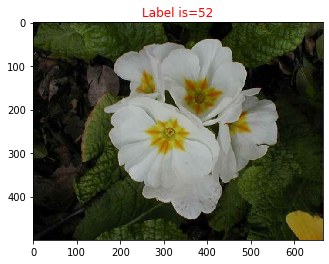

In [14]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 
for image,label in training_set.take(1):
    plt.imshow(image.numpy())
    plt.title('Label is=%i' % label.numpy() , color="r" )

### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [15]:
# checking the minimum and maximum label value in the "train_set"
minx = 1000
maxx = -1
for image,label in training_set.take(1000):
    minx = min(label.numpy(), minx)
    maxx = max(label.numpy(), maxx)
minx, maxx

(0, 101)

In [16]:
# checking the minimum and maximum label value in the "test_set"
minx = 1000
maxx = -1
for image,label in test_set.take(1000):
    minx = min(label.numpy(), minx)
    maxx = max(label.numpy(), maxx)
minx, maxx

(0, 101)

In [17]:
# checking the minimum and maximum label value in the "val_set"
minx = 1000
maxx = -1
for image,label in validation_set.take(1000):
    minx = min(label.numpy(), minx)
    maxx = max(label.numpy(), maxx)
minx, maxx

(0, 101)

### Reading the class names from the json file

In [15]:
# if you have label_map.json 
#with open('label_map.json', 'r') as f:
   # class_names = json.load(f)

In [18]:
# If you dont use the URL 
file_location='https://github.com/CheloGE/ML-tensorflow-Image_classifier-oxford_flowers102/blob/master/label_map.json?raw=1'
r = requests.get(file_location, stream=True)
class_names=json.loads(r.content.decode('utf-8'))
#print(class_names)

In [19]:
## Class names contain index from 1 to 102, 
#whereas the datasets have label indices from 0 to 101, hence remapping
class_names_new = dict()
for key in class_names:
    class_names_new[str(int(key)-1)] = class_names[key]

In [20]:
print(class_names_new)

{'20': 'fire lily', '2': 'canterbury bells', '44': 'bolero deep blue', '0': 'pink primrose', '33': 'mexican aster', '26': 'prince of wales feathers', '6': 'moon orchid', '15': 'globe-flower', '24': 'grape hyacinth', '25': 'corn poppy', '78': 'toad lily', '38': 'siam tulip', '23': 'red ginger', '66': 'spring crocus', '34': 'alpine sea holly', '31': 'garden phlox', '9': 'globe thistle', '5': 'tiger lily', '92': 'ball moss', '32': 'love in the mist', '8': 'monkshood', '101': 'blackberry lily', '13': 'spear thistle', '18': 'balloon flower', '99': 'blanket flower', '12': 'king protea', '48': 'oxeye daisy', '14': 'yellow iris', '60': 'cautleya spicata', '30': 'carnation', '63': 'silverbush', '67': 'bearded iris', '62': 'black-eyed susan', '68': 'windflower', '61': 'japanese anemone', '19': 'giant white arum lily', '37': 'great masterwort', '3': 'sweet pea', '85': 'tree mallow', '100': 'trumpet creeper', '41': 'daffodil', '21': 'pincushion flower', '1': 'hard-leaved pocket orchid', '53': 'sun

In [21]:
len(class_names_new.keys())

102

In [22]:
len(class_names_new.keys())

102

In [23]:
print(class_names)

{'21': 'fire lily', '3': 'canterbury bells', '45': 'bolero deep blue', '1': 'pink primrose', '34': 'mexican aster', '27': 'prince of wales feathers', '7': 'moon orchid', '16': 'globe-flower', '25': 'grape hyacinth', '26': 'corn poppy', '79': 'toad lily', '39': 'siam tulip', '24': 'red ginger', '67': 'spring crocus', '35': 'alpine sea holly', '32': 'garden phlox', '10': 'globe thistle', '6': 'tiger lily', '93': 'ball moss', '33': 'love in the mist', '9': 'monkshood', '102': 'blackberry lily', '14': 'spear thistle', '19': 'balloon flower', '100': 'blanket flower', '13': 'king protea', '49': 'oxeye daisy', '15': 'yellow iris', '61': 'cautleya spicata', '31': 'carnation', '64': 'silverbush', '68': 'bearded iris', '63': 'black-eyed susan', '69': 'windflower', '62': 'japanese anemone', '20': 'giant white arum lily', '38': 'great masterwort', '4': 'sweet pea', '86': 'tree mallow', '101': 'trumpet creeper', '42': 'daffodil', '22': 'pincushion flower', '2': 'hard-leaved pocket orchid', '54': 's

In [24]:
del class_names

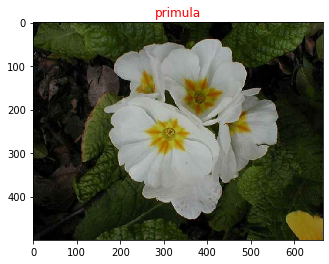

In [25]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 
# TODO: Plot 1 image from the training set. Set the title 

for image,label in training_set.take(1):
    plt.imshow(image.numpy())
    plt.title(class_names_new[str(label.numpy())] , color= 'r')

## Create Pipeline

# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [26]:
# TODO: Build and train your network.
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
BATCH_SIZE=64

In [27]:
def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image /= 255
    return image, label

#### The pipeline for each set that returns batches of images, with all the transformations :

In [28]:
training_batch = training_set.shuffle(buffer_size = 10 * BATCH_SIZE).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batch = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)
test_batch = test_set.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [29]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor = hub.KerasLayer(URL, input_shape=(IMG_SHAPE))
feature_extractor.trainable = False

In [30]:
    model = tf.keras.Sequential([feature_extractor,
                                 tf.keras.layers.Dense(600,activation='relu'),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(300,activation='relu'),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(num_classes, activation='softmax')
                                ])

    print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 600)               768600    
_________________________________________________________________
dropout (Dropout)            (None, 600)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               180300    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 102)               30702     
Total params: 3,237,586
Trainable params: 979,602
Non-trainable params: 2,257,984
________________________________________

In [31]:
# earlystop function 
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                          min_delta = 0.0001,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

In [32]:
# checkpoint function for save best accuracy automatic
checkpoint_filepath = './flower.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

In [33]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
EPOCHS = 30
history = model.fit(training_batch,
                    epochs=EPOCHS,
                    validation_data=validation_batch,
                    callbacks=[model_checkpoint_callback , earlystop_callback])

Epoch 1/30
16/16 [==============================] - 39s 2s/step - loss: 4.5254 - accuracy: 0.0392 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/30
16/16 [==============================] - 33s 2s/step - loss: 3.3217 - accuracy: 0.3078 - val_loss: 2.4938 - val_accuracy: 0.5069
Epoch 3/30
16/16 [==============================] - 33s 2s/step - loss: 1.9389 - accuracy: 0.5667 - val_loss: 1.6405 - val_accuracy: 0.6343
Epoch 4/30
16/16 [==============================] - 33s 2s/step - loss: 1.1472 - accuracy: 0.7186 - val_loss: 1.2956 - val_accuracy: 0.6922
Epoch 5/30
16/16 [==============================] - 33s 2s/step - loss: 0.7209 - accuracy: 0.8137 - val_loss: 1.0954 - val_accuracy: 0.7167
Epoch 6/30
16/16 [==============================] - 33s 2s/step - loss: 0.4623 - accuracy: 0.8873 - val_loss: 0.9784 - val_accuracy: 0.7333
Epoch 7/30
16/16 [==============================] - 32s 2s/step - loss: 0.3145 - accuracy: 0.9275 - val_loss: 0.9322 - val_accuracy: 0.7520
Epoch 8/30
1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


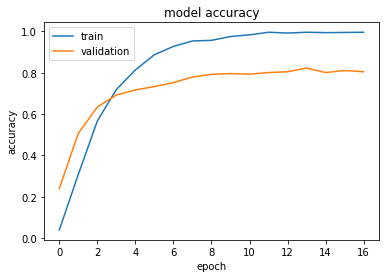

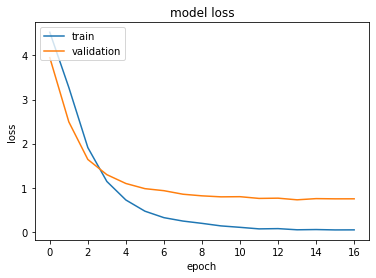

In [35]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [36]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
model.evaluate(test_batch)

97/97 [==============================] - 94s 969ms/step - loss: 0.9138 - accuracy: 0.7653


[0.9138136813321065, 0.7653277]

## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [39]:
# TODO: Save your trained model as a Keras model.

#save it througt checkpoint above 

#if you dont want use checkpoint function use this codes below 
path='./flower.h5'
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights(path)


## Load the Keras Model

Load the Keras model you saved above.

In [40]:
# TODO: Load the Keras model
model.load_weights(checkpoint_filepath)
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 600)               768600    
_________________________________________________________________
dropout (Dropout)            (None, 600)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               180300    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 102)               30702     
Total params: 3,237,586
Trainable params: 979,602
Non-trainable params: 2,257,984
________________________________________

# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [38]:
# TODO: Create the process_image function
def process_image(image):
    image=tf.convert_to_tensor(image,tf.float32)
    image=tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image/=255
    return image

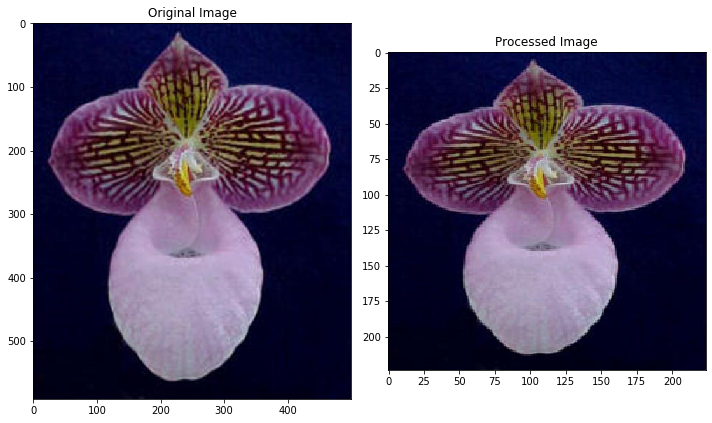

In [39]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

In [100]:
# TODO: Create the predict function
def predict(image_path=None, model=None, top_k=None):
    im = Image.open(image_path)
    test_image = np.asarray(im)
    processed_test_image = process_image(test_image)    
    #print(image_path.split("/")[-1])
    #plt.imshow(processed_test_image)
    processed_test_image=np.expand_dims(processed_test_image,0)
    probs=model.predict(processed_test_image)
    return tf.nn.top_k(probs, k=top_k)


In [67]:
def filtered(classes):
    return [class_names_new.get(str(key)) if key else "Placeholder" for key in classes.numpy().squeeze().tolist()]

In [101]:

def prediction_result(filename):
    probs, classes = predict(image_path=filename, model=model, top_k=5)
    print(f"\u2022 File: {filename} \n\u2022 Probability: {probs[0]}\n\u2022 Classes: {classes}")

    im = Image.open(filename)
    test_image = np.asarray(im)
    axis_label=filtered(classes)
    fig,(ax1,ax2)=plt.subplots(figsize=(10,3),ncols=2)
    ax1.imshow(test_image,cmap=plt.cm.binary)
    ax2.set_title('Class Probability')
    ax2.barh(np.array(axis_label),probs[0])

# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

In [104]:
filenames=[ './test_images/cautleya_spicata.jpg', 
           './test_images/hard-leaved_pocket_orchid.jpg',
           './test_images/orange_dahlia.jpg',
           './test_images/wild_pansy.jpg']

• File: ./test_images/cautleya_spicata.jpg 
• Probability: [0.85888106 0.11780059 0.00948624 0.00741534 0.00343509]
• Classes: [[60 23 45 14 10]]
• File: ./test_images/hard-leaved_pocket_orchid.jpg 
• Probability: [9.9995339e-01 1.1689261e-05 8.4223011e-06 6.4458563e-06 2.7228039e-06]
• Classes: [[ 1 79 76 66 67]]
• File: ./test_images/orange_dahlia.jpg 
• Probability: [0.6117803  0.30621955 0.04970106 0.01349318 0.00430663]
• Classes: [[ 4 58 65 40 62]]
• File: ./test_images/wild_pansy.jpg 
• Probability: [9.9994850e-01 1.4146743e-05 9.0662279e-06 3.8373341e-06 3.4928896e-06]
• Classes: [[51 18 68 80 81]]


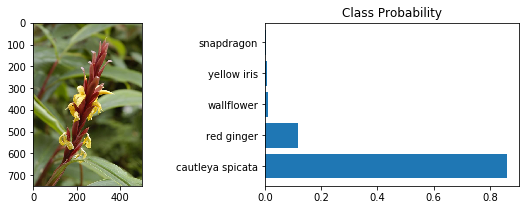

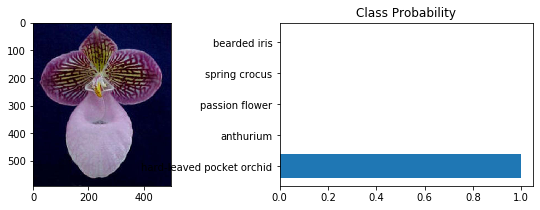

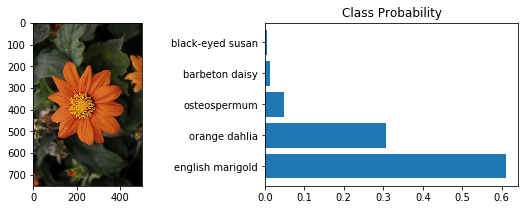

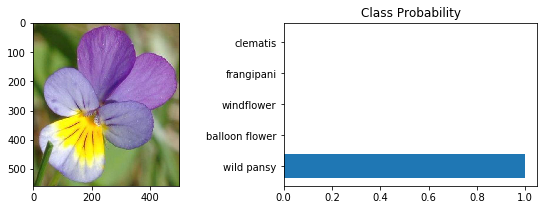

In [116]:

# TODO: Plot the input image along with the top 5 classes
x = range(4)
for n in x:
    prediction_result(filenames[n])